In [58]:
import yaml
import os
from rdkit.Chem import rdqueries
import pandas as pd
from rdkit import Chem

In [59]:
main_paths = {'Zeus':["/home/calvin/Dropbox/PersonalFolders/Calvin/HAb_Converged", "/home/calvin/Dropbox/PersonalFolders/Calvin/ZEUS_Failed",
                      "/home/calvin/Dropbox/PersonalFolders/Calvin/ZEUS_Converged"], 'Atlas': ["/home/calvin/Dropbox/PersonalFolders/Calvin/ATLAS_Converged", "/home/calvin/Dropbox/PersonalFolders/Calvin/ATLAS_Converged/NonRMG",
                                                                                                                                                        "/home/calvin/Dropbox/PersonalFolders/Calvin/ATLAS_Failed"]}


In [60]:
reaction_data = pd.DataFrame(columns=['reaction', 'server', 'reactant1', 'reactant2', 'no_of_carbon', 'no_of_nitrogen', 'no_of_oxygen', 'aromatic_exist', 'no_of_sgbonds', 'no_of_dbbonds', 'no_of_tpbonds'])

for server, paths in main_paths.items():
    for path in paths:
        for folder in os.listdir(path):
            if folder != 'NonRMG':
                with open(os.path.join(path, folder, 'input.yml'), 'r') as f:
                    input_dict = yaml.safe_load(f)
                species = input_dict['species']
                reactions = input_dict['reactions']
                reactants = []
                reactants.append(input_dict['reactions'][0]['label'].split()[0])
                reactants.append(input_dict['reactions'][0]['label'].split()[2])
                reactant_smiles = []
                for specie in species:
                    if specie['label'] in reactants:
                        reactant_smiles.append(specie['smiles'])
                try:
                    no_of_carbon = 0
                    no_of_nitrogen = 0
                    no_of_oxygen = 0
                    no_of_sgbonds = 0
                    no_of_dbbonds = 0
                    no_of_tpbonds = 0
                    for reactant in reactant_smiles:
                        aromatic = False
                        temp_mol = Chem.MolFromSmiles(reactant)
                        q = rdqueries.AtomNumEqualsQueryAtom(6)
                        no_of_carbon += len(temp_mol.GetAtomsMatchingQuery(q))
                        q = rdqueries.AtomNumEqualsQueryAtom(7)
                        no_of_nitrogen += len(temp_mol.GetAtomsMatchingQuery(q))
                        q = rdqueries.AtomNumEqualsQueryAtom(8)
                        no_of_oxygen += len(temp_mol.GetAtomsMatchingQuery(q))
                        for atom in temp_mol.GetAtoms():
                            if atom.GetIsAromatic():
                                aromatic = True
                                break
                        no_of_sgbonds += len([bond for bond in temp_mol.GetBonds() if bond.GetBondType() == Chem.BondType.SINGLE])
                        no_of_dbbonds += len([bond for bond in temp_mol.GetBonds() if bond.GetBondType() == Chem.BondType.DOUBLE])
                        no_of_tpbonds += len([bond for bond in temp_mol.GetBonds() if bond.GetBondType() == Chem.BondType.TRIPLE])
                        

                    new_row = pd.DataFrame([{'reaction': folder, 'server': server, 'reactant1': reactant_smiles[0], 'reactant2': reactant_smiles[1], 'no_of_carbon': no_of_carbon, 'no_of_nitrogen': no_of_nitrogen, 'no_of_oxygen': no_of_oxygen, 'aromatic_exist': aromatic, 'no_of_sgbonds': no_of_sgbonds, 'no_of_dbbonds': no_of_dbbonds, 'no_of_tpbonds': no_of_tpbonds}])
                    reaction_data = pd.concat([reaction_data, new_row], ignore_index=True)
                except:
                    print(f"Error in {folder}")

                
            

[12:58:07] WARNING: not removing hydrogen atom without neighbors
[12:58:07] WARNING: not removing hydrogen atom without neighbors
[12:58:07] WARNING: not removing hydrogen atom without neighbors
[12:58:07] WARNING: not removing hydrogen atom without neighbors
[12:58:07] WARNING: not removing hydrogen atom without neighbors
[12:58:07] WARNING: not removing hydrogen atom without neighbors
[12:58:07] WARNING: not removing hydrogen atom without neighbors
[12:58:07] WARNING: not removing hydrogen atom without neighbors
[12:58:07] WARNING: not removing hydrogen atom without neighbors
[12:58:07] WARNING: not removing hydrogen atom without neighbors
[12:58:07] WARNING: not removing hydrogen atom without neighbors
[12:58:07] WARNING: not removing hydrogen atom without neighbors
[12:58:07] WARNING: not removing hydrogen atom without neighbors
[12:58:07] WARNING: not removing hydrogen atom without neighbors
[12:58:07] WARNING: not removing hydrogen atom without neighbors
[12:58:07] WARNING: not r

Error in rmg_rxn_103
Error in rmg_rxn_110
Error in rmg_rxn_131
Error in rmg_rxn_144
Error in rmg_rxn_135
Error in rmg_rxn_139
Error in rmg_rxn_132
Error in rmg_rxn_147
Error in rmg_rxn_104
Error in rmg_rxn_138
Error in rmg_rxn_122
Error in rmg_rxn_148
Error in rmg_rxn_105
Error in rmg_rxn_126
Error in rmg_rxn_107
Error in rmg_rxn_118
Error in rmg_rxn_108
Error in rmg_rxn_149
Error in rmg_rxn_117
Error in rmg_rxn_120
Error in rmg_rxn_141
Error in rmg_rxn_121
Error in rmg_rxn_111
Error in rmg_rxn_106
Error in rmg_rxn_134
Error in rmg_rxn_116
Error in rmg_rxn_129
Error in rmg_rxn_137
Error in rmg_rxn_140
Error in rmg_rxn_119
Error in rmg_rxn_145
Error in rmg_rxn_143
Error in rmg_rxn_115
Error in rmg_rxn_114
Error in rmg_rxn_123
Error in rmg_rxn_125
Error in rmg_rxn_130
Error in rmg_rxn_142
Error in rmg_rxn_113
Error in rmg_rxn_133
Error in rmg_rxn_146
Error in rmg_rxn_127
Error in rmg_rxn_124
Error in rmg_rxn_109
Error in rmg_rxn_128
Error in rmg_rxn_112
Error in rmg_rxn_136
Error in rmg_

[12:58:10] SMILES Parse Error: syntax error while parsing: [O-][N
[12:58:10] SMILES Parse Error: check for mistakes around position 6:
[12:58:10] [O-][N
[12:58:10] ~~~~~^
[12:58:10] SMILES Parse Error: Failed parsing SMILES '[O-][N' for input: '[O-][N'
[12:58:10] SMILES Parse Error: syntax error while parsing: [O-][N
[12:58:10] SMILES Parse Error: check for mistakes around position 6:
[12:58:10] [O-][N
[12:58:10] ~~~~~^
[12:58:10] SMILES Parse Error: Failed parsing SMILES '[O-][N' for input: '[O-][N'
[12:58:10] SMILES Parse Error: syntax error while parsing: [O-][N
[12:58:10] SMILES Parse Error: check for mistakes around position 6:
[12:58:10] [O-][N
[12:58:10] ~~~~~^
[12:58:10] SMILES Parse Error: Failed parsing SMILES '[O-][N' for input: '[O-][N'
[12:58:10] SMILES Parse Error: syntax error while parsing: [O-][N
[12:58:10] SMILES Parse Error: check for mistakes around position 6:
[12:58:10] [O-][N
[12:58:10] ~~~~~^
[12:58:10] SMILES Parse Error: Failed parsing SMILES '[O-][N' for inpu

In [61]:
reaction_data

,reaction,server,reactant1,reactant2,no_of_carbon,no_of_nitrogen,no_of_oxygen,aromatic_exist,no_of_sgbonds,no_of_dbbonds,no_of_tpbonds
0,rxn_1366,Zeus,C#C[C]=C,C#CCC#C,9,0,0,False,3,1,3
1,rxn_1019,Zeus,C[C](S)C,C=CC,6,0,0,False,4,1,0
2,rxn_1098,Zeus,[CH]=C,C=CC(C)C,7,0,0,False,3,2,0
3,rxn_1619,Zeus,C=CC,C[CH]c1ccccc1,11,0,0,True,3,1,0
4,rxn_156,Zeus,[Cl],CCCCOC(C)=O,6,0,2,False,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2624,rmg_rxn_1310,Atlas,[NH-][N+](=C)O,CC[CH]O[O],4,2,3,False,6,1,0
2625,rmg_rxn_1297,Atlas,[O-][NH+]CC,CC[CH]O[O],5,1,3,False,7,0,0
2626,rmg_rxn_1307,Atlas,[O-][NH+]=N,CC[CH]O[O],3,2,3,False,5,1,0
2627,rmg_rxn_864,Atlas,[CH2]CN=O,[CH]1C=CC=CC1,8,1,1,False,6,3,0


In [62]:
mol = Chem.MolFromSmiles('C#C[C]=C')
for bond in mol.GetBonds():
    print(bond.GetBondType())
    
    # Triple bond is TRIPLE
    # Double bond is DOUBLE
    # Single bond is SINGLE
    if bond.GetBondType() == Chem.BondType.TRIPLE:
        print('Triple bond')


TRIPLE
Triple bond
SINGLE
DOUBLE


In [76]:
rmg_reaction_path = '/home/calvin/code/CMPNN_HydrogenAbstraction/data/rmg_rxn_smiles.csv'
rmg_reaction_data = pd.read_csv(rmg_reaction_path)

reaction_complete_data = pd.DataFrame(columns=['reaction', 'server', 'reactant1', 'reactant2', 'no_of_carbon', 'no_of_nitrogen', 'no_of_oxygen', 'aromatic_exist', 'no_of_sgbonds', 'no_of_dbbonds', 'no_of_tpbonds'])
for index, row in rmg_reaction_data.iterrows():
    reactants = [row['r1'], row['r2']]

    no_of_carbon = 0
    no_of_nitrogen = 0
    no_of_oxygen = 0
    no_of_sgbonds = 0
    no_of_dbbonds = 0
    no_of_tpbonds = 0
    for reactant in reactants:
        aromatic = False
        temp_mol = Chem.MolFromSmiles(reactant)
        q = rdqueries.AtomNumEqualsQueryAtom(6)
        no_of_carbon += len(temp_mol.GetAtomsMatchingQuery(q))
        q = rdqueries.AtomNumEqualsQueryAtom(7)
        no_of_nitrogen += len(temp_mol.GetAtomsMatchingQuery(q))
        q = rdqueries.AtomNumEqualsQueryAtom(8)
        no_of_oxygen += len(temp_mol.GetAtomsMatchingQuery(q))
        for atom in temp_mol.GetAtoms():
            if atom.GetIsAromatic():
                aromatic = True
                break
        no_of_sgbonds += len([bond for bond in temp_mol.GetBonds() if bond.GetBondType() == Chem.BondType.SINGLE])
        no_of_dbbonds += len([bond for bond in temp_mol.GetBonds() if bond.GetBondType() == Chem.BondType.DOUBLE])
        no_of_tpbonds += len([bond for bond in temp_mol.GetBonds() if bond.GetBondType() == Chem.BondType.TRIPLE])

    new_row = pd.DataFrame([{'reaction': row['rxn'], 'server': 'RMG', 'reactant1': reactants[0], 'reactant2': reactants[1], 'no_of_carbon': no_of_carbon, 'no_of_nitrogen': no_of_nitrogen, 'no_of_oxygen': no_of_oxygen, 'aromatic_exist': aromatic, 'no_of_sgbonds': no_of_sgbonds, 'no_of_dbbonds': no_of_dbbonds, 'no_of_tpbonds': no_of_tpbonds}])
    reaction_complete_data = pd.concat([reaction_complete_data, new_row], ignore_index=True)
reaction_complete_data

reaction_complete_data.to_csv('reaction_complete.csv', index=False)

[14:08:10] WARNING: not removing hydrogen atom without neighbors
[14:08:10] WARNING: not removing hydrogen atom without neighbors
[14:08:10] WARNING: not removing hydrogen atom without neighbors
[14:08:10] WARNING: not removing hydrogen atom without neighbors
[14:08:10] WARNING: not removing hydrogen atom without neighbors
[14:08:10] WARNING: not removing hydrogen atom without neighbors
[14:08:10] WARNING: not removing hydrogen atom without neighbors
[14:08:10] WARNING: not removing hydrogen atom without neighbors
[14:08:10] WARNING: not removing hydrogen atom without neighbors
[14:08:10] WARNING: not removing hydrogen atom without neighbors
[14:08:10] WARNING: not removing hydrogen atom without neighbors
[14:08:10] WARNING: not removing hydrogen atom without neighbors
[14:08:10] WARNING: not removing hydrogen atom without neighbors
[14:08:10] WARNING: not removing hydrogen atom without neighbors
[14:08:10] WARNING: not removing hydrogen atom without neighbors
[14:08:10] WARNING: not r

In [69]:
info_reaction = pd.read_csv('/home/calvin/code/arc_analysis/reaction_data.csv')

# Merge the two dataframes on 'rxn'
merged_reaction_data = pd.merge(reaction_data, info_reaction, on='reaction')
merged_reaction_data[merged_reaction_data['converged'] == True]


,reaction,server_x,reactant1,reactant2,no_of_carbon,no_of_nitrogen,no_of_oxygen,aromatic_exist,no_of_sgbonds,no_of_dbbonds,no_of_tpbonds,server_y,converged,error,best_ts_method,branch,execution_time
0,rxn_1366,Zeus,C#C[C]=C,C#CCC#C,9,0,0,False,3,1,3,Zeus,True,NaN,heuristics,qchem,9755.0
1,rxn_1019,Zeus,C[C](S)C,C=CC,6,0,0,False,4,1,0,Zeus,True,NaN,heuristics,qchem,7697.0
3,rxn_1619,Zeus,C=CC,C[CH]c1ccccc1,11,0,0,True,3,1,0,Zeus,True,NaN,heuristics,gaussian_unconverge_trsh,22960.0
6,rxn_1561,Zeus,CC(C)c1ccccc1,C[C]=S,11,0,0,False,4,1,0,Zeus,True,NaN,heuristics,zeus_run,179718.0
7,rxn_1316,Zeus,C#CC(C)C,C[CH]c1ccccc1,13,0,0,True,5,0,1,Zeus,True,NaN,autotst,qchem,62312.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429,rxn_3229,Atlas,[NH]CC#N,N#CCC#N,5,4,0,False,4,0,3,Atlas,True,NaN,heuristics,gauss_trsh_cleanup,8823.0
2433,rxn_3118,Atlas,[N]=c1onno1,N,1,4,2,False,0,1,0,Atlas,True,NaN,heuristics,gauss_trsh_cleanup,5316.0
2437,rxn_3211,Atlas,[NH]CC#N,CO,3,2,1,False,3,0,1,Atlas,True,NaN,heuristics,gauss_trsh_cleanup,9448.0
2438,rxn_3215,Atlas,[NH]CC#N,CC#N,4,3,0,False,3,0,2,Atlas,True,NaN,heuristics,gauss_trsh_cleanup,5824.0


Text(0.5, 1.0, 'Number of Carbon Atoms in Reactants')

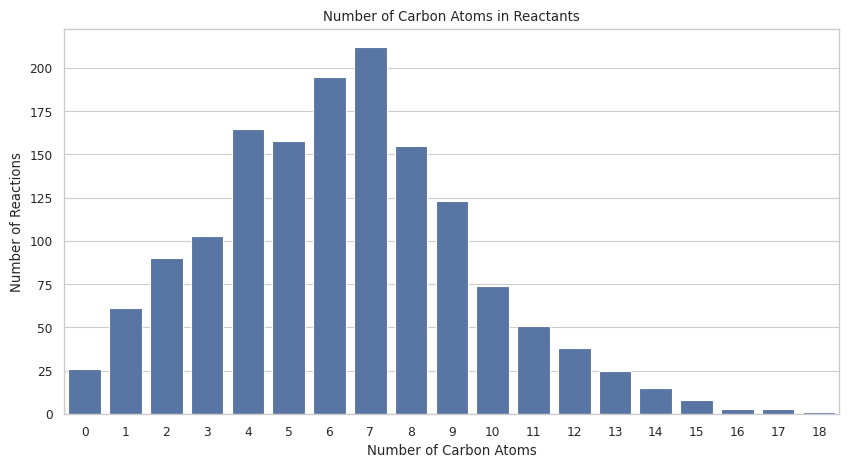

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(10, 5))
# Plot a count of how many carbon counts are there
sns.countplot(data=merged_reaction_data[merged_reaction_data['converged'] == True], x='no_of_carbon')
plt.xlabel('Number of Carbon Atoms')
plt.ylabel('Number of Reactions')
plt.title('Number of Carbon Atoms in Reactants')

Text(0.5, 1.0, 'Number of Nitrogen Atoms in Reactants')

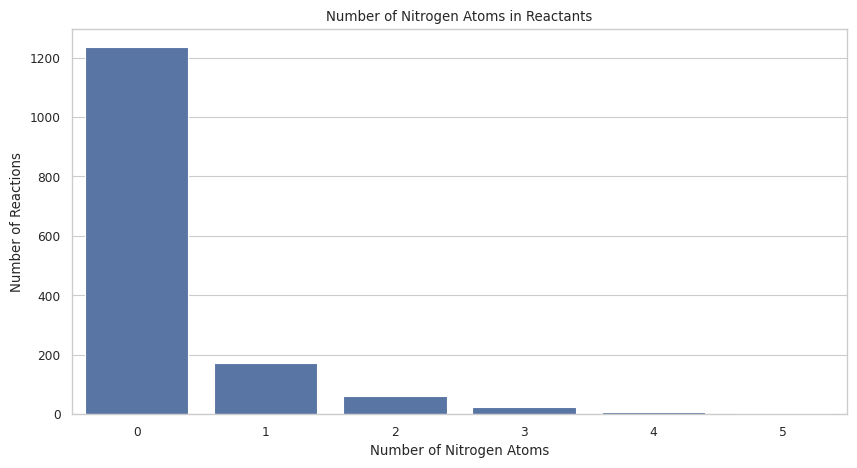

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(10, 5))
# Plot a count of how many carbon counts are there
sns.countplot(data=merged_reaction_data[merged_reaction_data['converged'] == True], x='no_of_nitrogen')
plt.xlabel('Number of Nitrogen Atoms')
plt.ylabel('Number of Reactions')
plt.title('Number of Nitrogen Atoms in Reactants')

Text(0.5, 1.0, 'Number of Oxygen Atoms in Reactants')

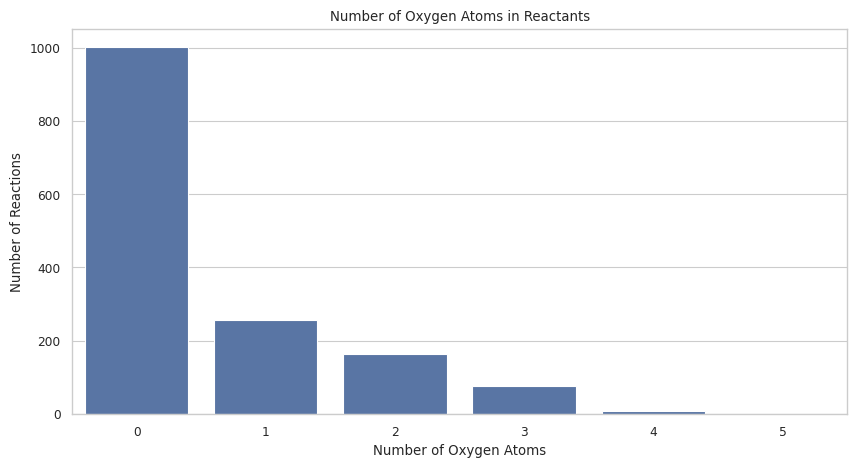

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(10, 5))
# Plot a count of how many carbon counts are there
sns.countplot(data=merged_reaction_data[merged_reaction_data['converged'] == True], x='no_of_oxygen')
plt.xlabel('Number of Oxygen Atoms')
plt.ylabel('Number of Reactions')
plt.title('Number of Oxygen Atoms in Reactants')

Text(0.5, 1.0, 'Number of Carbon Atoms in Reactants')

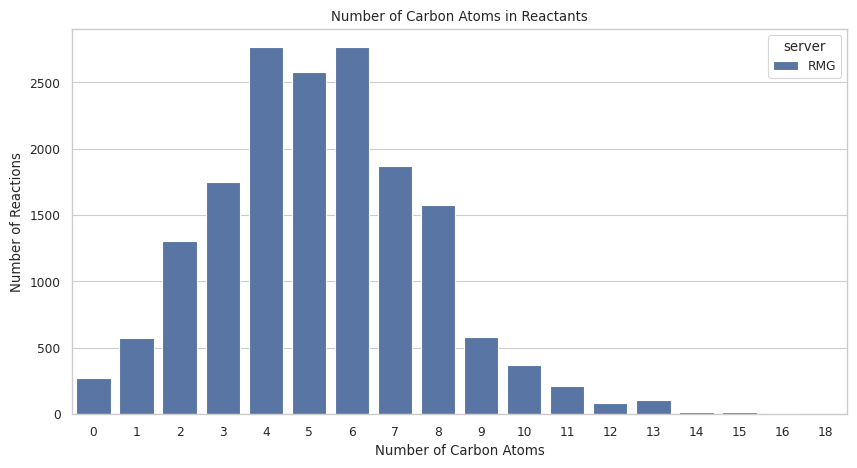

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(10, 5))
# Plot a count of how many carbon counts are there
sns.countplot(data=reaction_complete_data, x='no_of_carbon', hue='server')
plt.xlabel('Number of Carbon Atoms')
plt.ylabel('Number of Reactions')
plt.title('Number of Carbon Atoms in Reactants')